AIM 1: Variance and Covariance

1. Load the dataset 'diabetic_data.csv' using pandas
2. Calculate variance on the column 'num_med_proc'
    2.1. For the same column, also calculate standard deviation
    2.2. Do both variance and standard deviation give you the same understanding of the data?
3. Calculate covariance between the columns 'num_med_proc' and 'time_in_hospital'
    3.1. Calculate correlation between the same two variables
    3.2. Do both covariance and correlation give you the same understanding of the data?

In [10]:
import pandas as pd
import numpy as np
ds = pd.read_csv('diabetic_data.csv')
print(np.std(ds['num_med_proc']))
print(np.var(ds['num_med_proc']))
print(np.cov(ds['num_med_proc'], ds['time_in_hospital']))
print(np.corrcoef(ds['num_med_proc'], ds['time_in_hospital']))

23.59533926803193
556.7400351735295
[[556.745631    30.98368242]
 [ 30.98368242   8.92203023]]
[[1.         0.43961528]
 [0.43961528 1.        ]]


AIM 2: Handle data with bimodal distribution. 

1. Create two separate normally distributed data of 100 items. One with mean 2 and the other with -2. Both will have an STD of 1.2
    1.1. You can try different values as well, as long as the result is a bimodal distribution
2. Combine the two datasets using concatenate() from NumPy library
3. Plot the histogram of this bimodal distribution. 
    3.1. You can use whatever library you want
4. Calculate kurtosis and skewness. 
    4.1. You can use whatever library you want. But I suggest you try SciPy's skew() and kurtosis().    

C:\Users\Kasugano Sora\AppData\Local\Temp\ipykernel_34988\1450171132.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_data, shade=True)


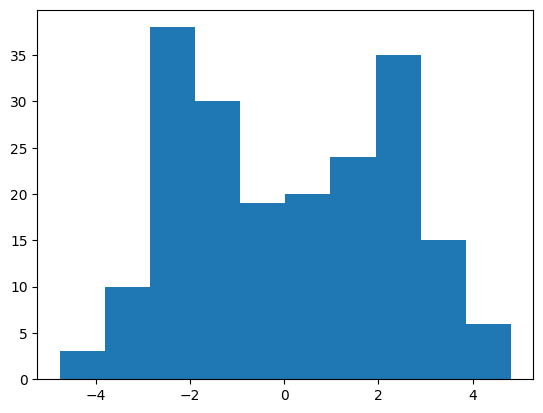

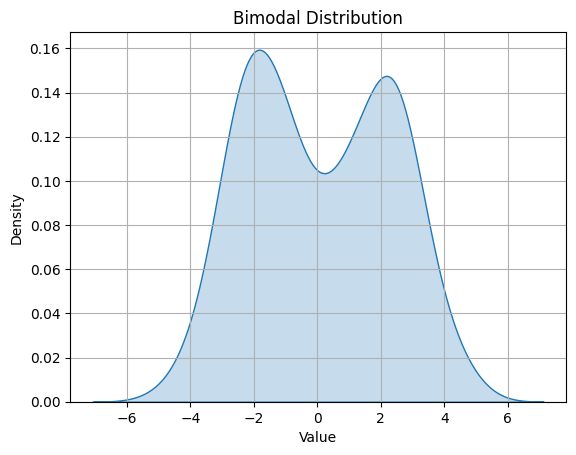

-1.1839589254685075
0.05682744997433156


In [11]:
from scipy.stats import kurtosis, skew
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
mean1, mean2 = 2, -2
std_dev = 1.2
size = 100
size_min = 30

data1 = np.random.normal(mean1, std_dev, size)
data2 = np.random.normal(mean2, std_dev, size)

data1_min = np.random.normal(mean1, std_dev, size_min)
data2_min = np.random.normal(mean2, std_dev, size_min)

combined_data = np.concatenate((data1, data2))
combined_data_min = np.concatenate((data1_min, data2_min))
#print(combined_data)
plt.figure()
plt.hist(combined_data)

plt.figure()
sns.kdeplot(combined_data, shade=True)
plt.title("Bimodal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()
kurto = stats.kurtosis(combined_data, bias = False)
print(kurto)
skewness = stats.skew(combined_data, bias = False)
print(skewness)

AIM 3: Test normality for the generated bimodal distribution

1. Visualize the given data with a Q-Q plot
2. Compute its normality using Shapiro-Wilk test
    2.1. Is the data normal? Why and how did you decide that? 
3. Repeat the normality test, but this time using Anderson-Darling Test
    3.1. Is the data normal? Why and how did you decide that?

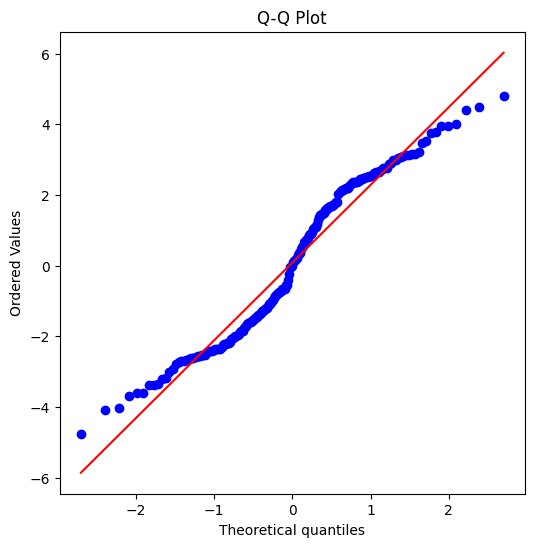

AndersonResult(statistic=np.float64(3.4638756575969296), critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(0.08402784312868562), scale=np.float64(2.226523648343493))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [12]:
plt.figure(figsize=(6, 6))
stats.probplot(combined_data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

shapiro_test = stats.shapiro(combined_data)
shapiro_test

ad = stats.anderson(combined_data)
ad


AIM 4: Repeat AIM 2 and AIM 3 steps for normal data

1. Generate normally distirbuted data of 100 data items
2. Visualize it using Q-Q plot
3. Perform both Shapiro-Wilk and Anderson-Darling test on this data
    3.1. What from these tests tells you that the data is normal?
4. What happens when the data items is reduced to 30?

-0.8236876422848391
0.11618837209549525


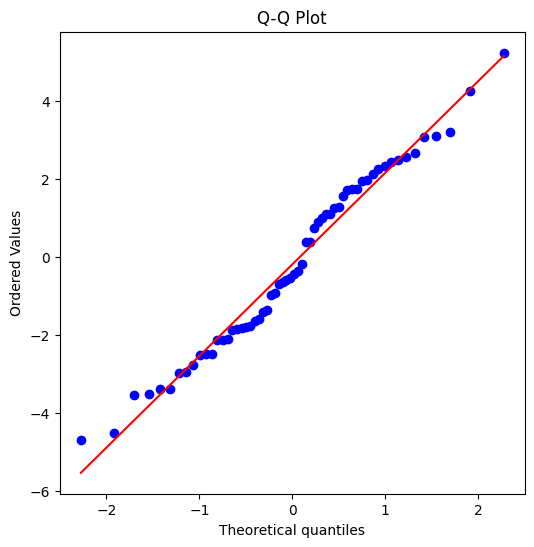

AndersonResult(statistic=np.float64(3.4638756575969296), critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(0.08402784312868562), scale=np.float64(2.226523648343493))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [13]:
kurto = stats.kurtosis(combined_data_min, bias = False)
print(kurto)
skewness = stats.skew(combined_data_min, bias = False)
print(skewness)
plt.figure(figsize=(6, 6))
stats.probplot(combined_data_min, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()
shapiro_test = stats.shapiro(combined_data)
shapiro_test
ad = stats.anderson(combined_data)
ad

AIM 5: ANOVA on the supplied dataset

1. Load the diabetic_data.csv dataset. 
2. Find out the unique values under the 'race' columns
    2.1. These are your distinct groups
3. Visualize the continuous variable using first histogram and the Q-Q plot
    3.1. Does it look normally distributed?
4. Since the sample size is large, use Anderson-Darling test to objectively test if the data is normally distributed 
5. Next, using boxplot, visualize the 'num_med_proc' distribution across the different categories under the 'race' column
    5.1. Based on the visuals, we would like to test if there's difference in the number of medications and procedures for different categories of races. 
    5.2. What will be the Null Hypothesis and Alternative Hypothesis?
    H0 (Null Hypothesis): ??
    Ha (Alternative Hypothesis): ??
6. Use first ANOVA to test the hypothesis
    6.1. What is the result?
7. Now use Kruskal-Wallis Test, since the data is not normally distributed
    7.1. What is the result?
8. What can you conclude from the results of the above two tests, even though the data is non-normal?

['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
AndersonResult(statistic=np.float64(1535.9266570095206), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(54564131.46287678), scale=np.float64(38664613.061962746))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


c:\Users\Kasugano Sora\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 99493.
  res = hypotest_fun_out(*samples, **kwds)


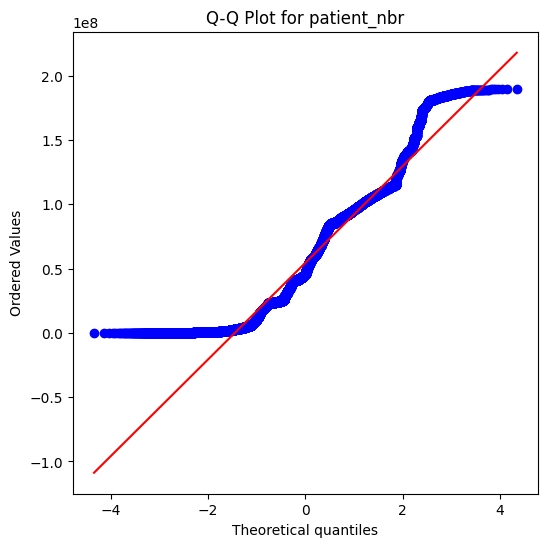

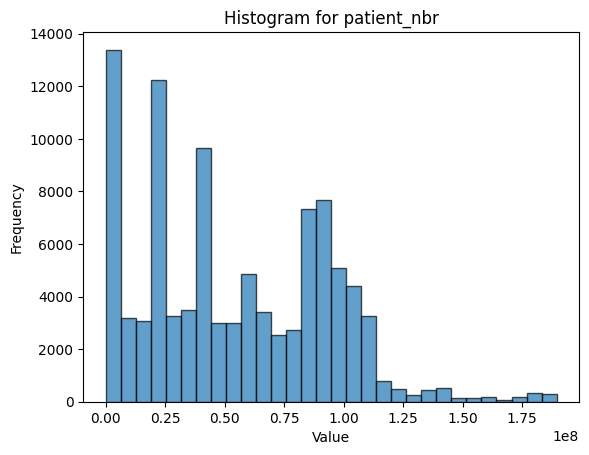

ANOVA result:
F-statistic:12.454717826440142,P_value:3.962106548933667e-10
ANOVA : THERE IS A  significant difference between the group
kruskal result:
H-statistic:52.17798202426288,P_value:1.2661582646035497e-10
AndersonResult(statistic=np.float64(3302.8223900590383), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(4.398419989345984), scale=np.float64(2.9869767708823223))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


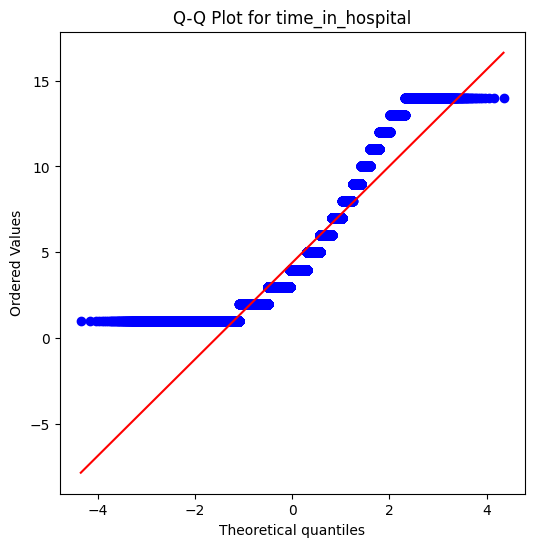

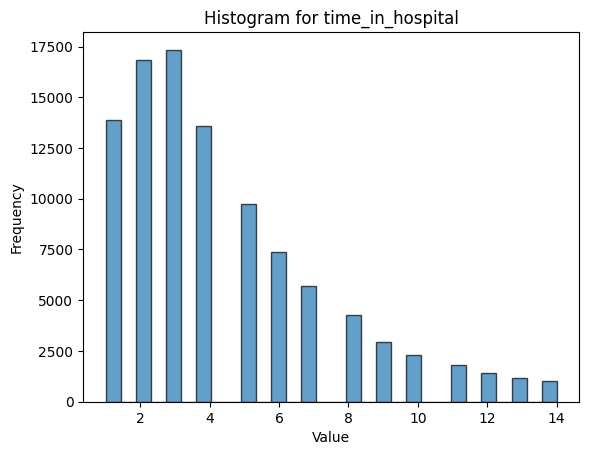

ANOVA result:
F-statistic:12.454717826440142,P_value:3.962106548933667e-10
ANOVA : THERE IS A  significant difference between the group
kruskal result:
H-statistic:52.17798202426288,P_value:1.2661582646035497e-10
AndersonResult(statistic=np.float64(96.61245024697564), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(60.43976963203441), scale=np.float64(23.595457846812025))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


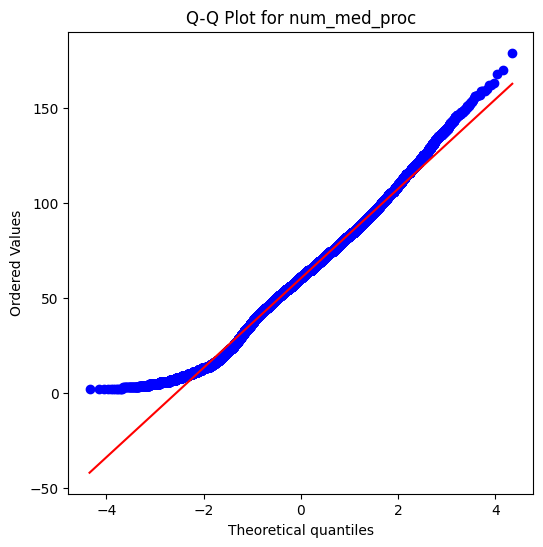

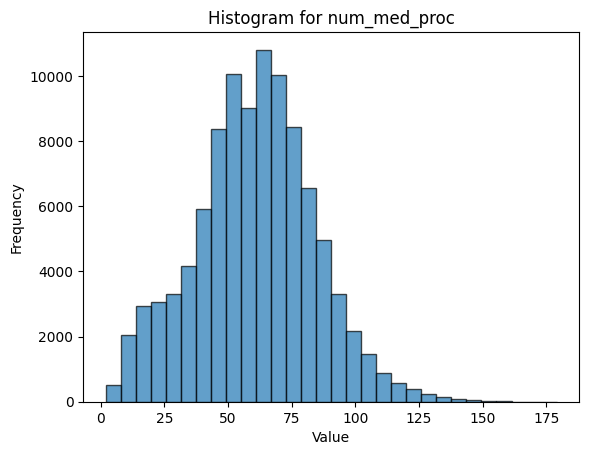

ANOVA result:
F-statistic:12.454717826440142,P_value:3.962106548933667e-10
ANOVA : THERE IS A  significant difference between the group
kruskal result:
H-statistic:52.17798202426288,P_value:1.2661582646035497e-10
AndersonResult(statistic=np.float64(8097.800316863722), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(7.4392168293246765), scale=np.float64(1.9260638685266074))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


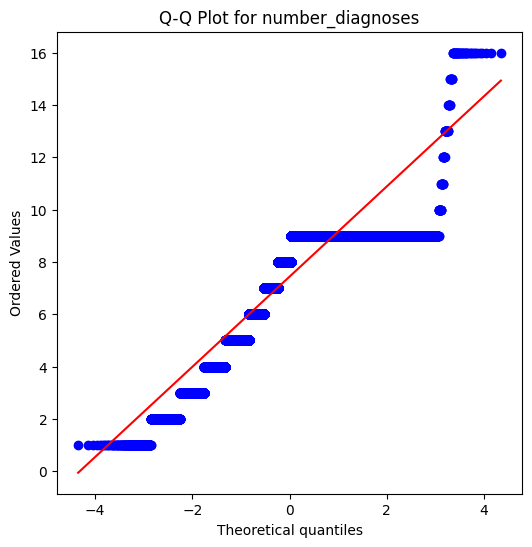

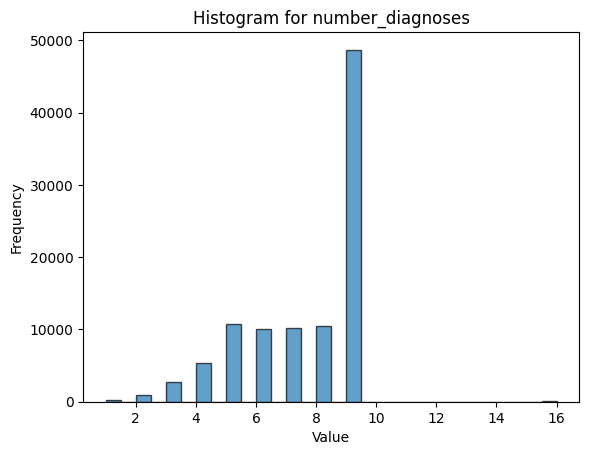

ANOVA result:
F-statistic:12.454717826440142,P_value:3.962106548933667e-10
ANOVA : THERE IS A  significant difference between the group
kruskal result:
H-statistic:52.17798202426288,P_value:1.2661582646035497e-10


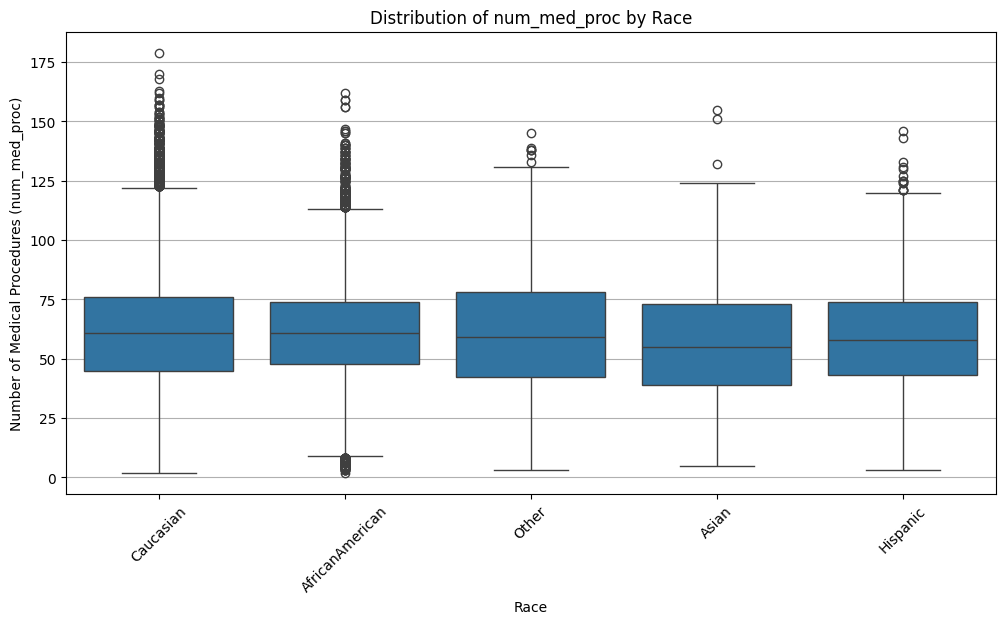

In [14]:
uv = ds['race'].unique()
print(uv)
for column in ds.columns:
    try:
        shapiro_test = stats.shapiro(ds[column])
        ad = stats.anderson(ds[column])
        print(ad)
        if shapiro_test.pvalue:
            
            plt.figure(figsize=(6, 6))
            stats.probplot(ds[column], dist="norm", plot=plt)
            plt.title(f"Q-Q Plot for {column}")
            plt.show()
            
            plt.figure()
            plt.hist(ds[column], bins=30, edgecolor='k', alpha=0.7)
            plt.title(f"Histogram for {column}")
            plt.xlabel("Value")
            plt.ylabel("Frequency")
            plt.show()
        anova_result = stats.f_oneway(
            ds[ds['race'] == uv[0]]['num_med_proc'],
            ds[ds['race'] == uv[1]]['num_med_proc'],
            ds[ds['race'] == uv[2]]['num_med_proc'],
            ds[ds['race'] == uv[3]]['num_med_proc'],
            ds[ds['race'] == uv[4]]['num_med_proc']
        )
        print("ANOVA result:")
        print(f"F-statistic:{anova_result.statistic},P_value:{anova_result.pvalue}")
        
        if anova_result.pvalue < 0.05 :
            print("ANOVA : THERE IS A  significant difference between the group")
        else :
            print("ANOVA : THERE IS no  significant difference between the group")

        kruskal_result = stats.kruskal(
            ds[ds['race'] == uv[0]]['num_med_proc'],
            ds[ds['race'] == uv[1]]['num_med_proc'],
            ds[ds['race'] == uv[2]]['num_med_proc'],
            ds[ds['race'] == uv[3]]['num_med_proc'],
            ds[ds['race'] == uv[4]]['num_med_proc']
        )
        print("kruskal result:")
        print(f"H-statistic:{kruskal_result.statistic},P_value:{kruskal_result.pvalue}")        
        if kruskal_result.pvalue < 0.05 :
            print("kruskal : THERE IS A  significant difference between the group")
        else :
            print("kruskal : THERE IS no  significant difference between the group")

    except Exception:
        continue

plt.figure(figsize=(12, 6))
sns.boxplot(x='race', y='num_med_proc', data=ds)
plt.title('Distribution of num_med_proc by Race')
plt.xlabel('Race')
plt.ylabel('Number of Medical Procedures (num_med_proc)')
plt.xticks(rotation=45)
plt.grid(axis='y')